# Exercícios

### 1- Implemente o classificador `1-Vizinho mais próximo` de forma que execute da seguinte forma:

#### - Seja uma função e receba como argumento o conjunto de conhecimento e os dados a serem classificados. 
#### - - Por exemplo: `umVizinhoProximo(base_conhecimento, registros_para_classificar)`
#### - Retorne uma lista de rótulos na mesma ordem que os registros para classificar. Assim, o primeiro item da lista seja o rótulo do primeiro registro
#### - Classifique todos os registro de maneira iterativa e independente da quantidade
#### - Em caso de empate, defina uma regra de desempate

In [ ]:
! pip install pandas matplotlib

In [2]:
import pandas as pd

base = pd.read_csv('base_conhecimento.csv')
registros_para_classificar = pd.read_csv('registros_para_classificar.csv')


In [3]:
def dist_euclidiana(obj1: list, obj2: list) -> float | None:
  if len(obj1) != len(obj2):
    return None
  total = 0
  for x1, x2 in zip(obj1, obj2):
    total += (x1 - x2)**2
  return (total)**(1/2)

def umVizinhoProximo(base_conhecimento: list[list], registros_para_classificar: list[list]) -> list:
    classificados = []
    for registro in registros_para_classificar:
        dists = []
        for classificado in base_conhecimento:
          dists.append(dist_euclidiana(registro, classificado[:-1]))
        rotulo = base_conhecimento[dists.index(min(dists))][-1]
        classificados.append(rotulo)
    return classificados
            

In [4]:
rotulos = umVizinhoProximo(base.values.tolist(), registros_para_classificar.values.tolist())
rotulos

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa']

### 2- Altere a implementação anterior para que possa ser indicado quantos vizinhos (k) deseja-se considerar, de forma que execute da seguinte forma:

#### - Seja uma função e receba como argumento o conjunto de conhecimento, os dados a serem classificados e quantos vizinhos deve considerar para tomar a decisão sobre qual rótulo indicar para o registro. Nesse caso, é computado a distância para todos os registros na base de conhecimento, em seguida, use os k vizinhos mais próximos para verificar qual dos rótulos aparece mais vezes. O rótulo que aparecer mais vezes é utilizado para rotular o registro em questão.
#### - - Por exemplo: `kVizinhoProximo(base_conhecimento, registros_para_classificar, k)`
#### - Retorne uma lista de rótulos na mesma ordem que os registros para classificar. Assim, o primeiro item da lista seja o rótulo do primeiro registro
#### - Classifique todos os registro de maneira iterativa e independente da quantidade
#### - Em caso de empate, defina uma regra de desempate

In [23]:
def kVizinhoProximo(base_conhecimento: list[list], registros_para_classificar: list[list], k: int) -> list:
    if k > len(base_conhecimento):
       k = len(base_conhecimento)
    classificados = []
    for registro in registros_para_classificar:
        dists = {}
        for i, classificado in enumerate(base_conhecimento):
          # dists.append(dist_euclidiana(registro, classificado[:-1]))
          dists[i] = dist_euclidiana(registro, classificado[:-1])

        knn = sorted(dists.items(), key= lambda item: item[1])[:k]
        rotulos=  []
        for i, _ in knn:
          rotulos.append(base_conhecimento[i][-1])

        contagem = {}
        for r in rotulos:
            contagem[r] = contagem.get(r, 0) + 1
        
        max_votos = max(contagem.values())
        candidatos = [rot for rot, cont in contagem.items() if cont == max_votos]
        
        if len(candidatos) == 1:
            rótulo_escolhido = candidatos[0]
        else: # desempate escolhendo o rótulo do vizinho mais próximo entre os empatados
            rótulo_escolhido = ''
            for i, _ in knn:
                rotulo = base_conhecimento[i][-1]
                if rotulo in candidatos:
                    rótulo_escolhido = rotulo
                    break
        
        classificados.append(rótulo_escolhido)
                    
    return classificados

In [38]:
rotulados = kVizinhoProximo(base.values.tolist(), registros_para_classificar.values.tolist(), 15)
rotulados

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa']

## Resposta ideal

#### A resposta correta para cada registro está no arquivo `respostas_em_ordem.csv`

### 3- Com quantos k vizinhos conseguiu a maior quantidade de acerto?

In [59]:
i = 1
k = {}
while i <= 100:
    k[i] = kVizinhoProximo(base.values.tolist(), registros_para_classificar.values.tolist(), i)
    i+=1

respostas = pd.read_csv('respostas_em_ordem.csv')
respostas = respostas['Species'].tolist()

erros = {}
for i, rotulados in k.items():
    erro = 0
    for res, rot in zip(rotulados, respostas):
        if res != rot:
            erro+=1
    erros[i] = erro
for i, e in erros.items():
    if e == 0:
        print(i, end=', ')

15, 17, 18, 19, 23, 25, 26, 

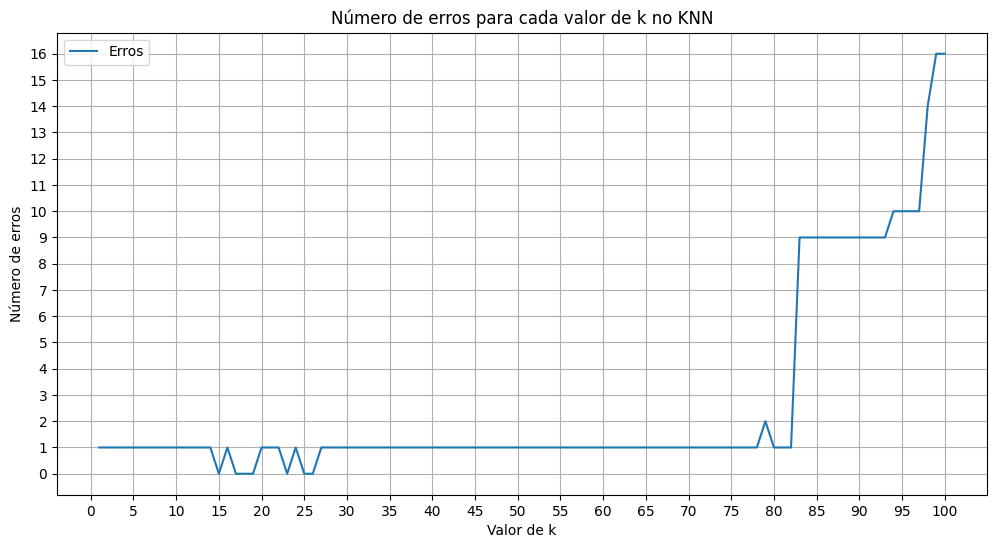

In [60]:
import matplotlib.pyplot as plt

k_vals = list(erros.keys())
num_erros = list(erros.values())

plt.figure(figsize=(12, 6))
plt.plot(k_vals, num_erros, label='Erros')
plt.xlabel('Valor de k')
plt.ylabel('Número de erros')
plt.title('Número de erros para cada valor de k no KNN')
plt.grid(True)
plt.legend()
plt.xticks(range(0, 101, 5))
plt.yticks(range(0, 17, 1))
# plt.tight_layout()
plt.show()

# Conclusões

- Percebe-se que para grandes parte dos k iniciais, de 0 até 80, possui apennas um erro. O que significa que os valores e resultados obtidos a partir do algoritmo desenvolvido estão bem próximos do resultado esperado. 
- A partir de 80 os erros sobem bastante.
- O algoritmo KNN com o k com os valores de 15, 17, 18, 19, 23, 25 e 26 são os quais obtém-se o resultado com a maior taxa de acerto, zero erros.